# Problem Statement and Primary Steps

We have taken up the Pima Indians Diabetes dataset and formed a classification problem on it. Let’s start by gauging the dataset and observe the kind of data we are dealing with. We will do this by importing the necessary libraries:

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Now, we will load the data into a data frame and observe some rows to get insights into the data.

In [13]:
data_file_path = 'diabetes.csv'
data_df = pd.read_csv(data_file_path)
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We need to predict the ‘Outcome’ column. Let us separate it and assign it to a target variable ‘y’. The rest of the data frame will be the set of input variables X.

In [18]:
y = data_df["Outcome"].values
x = data_df.drop(["Outcome"],axis=1)
print(x.head())
print(y[0:5])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
[1 0 1 0 1]


Now let’s scale the predictor variables and then separate the training and the testing data.

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_df = ss.fit_transform(data_df)

#Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

Since the outcomes are classified in a binary form, we will use the simplest K-nearest neighbor classifier(Knn) to classify whether the patient has diabetes or not.

In [24]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To derive more insights from this, let us plot the training data(in red) and the testing data(in blue).

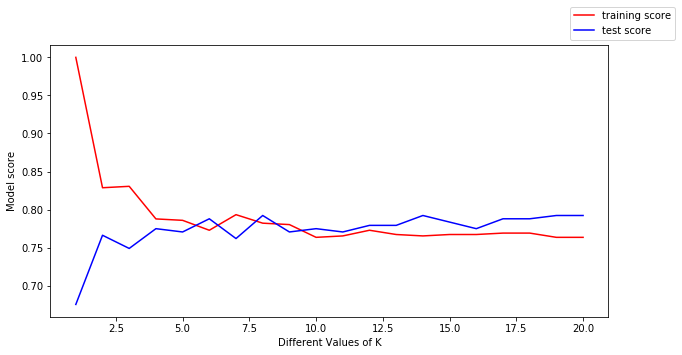

In [25]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

To calculate the scores for a particular value of k,

In [28]:
knn = KNeighborsClassifier(n_neighbors = 14)
#Fit the model
knn.fit(X_train,y_train)
#get the score
knn.score(X_test,y_test)

0.7922077922077922

We can make the following conclusions from the above plot:

1. For low values of k, the training score is high, while the testing score is low
2. As the value of k increases, the testing score starts to increase and the training score starts to decrease.
3. However, at some value of k, both the training score and the testing score are close to each other.

This is where Bias and Variance come into the picture.